In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *

# Loading your IBM Quantum account(s)
IBMQ.load_account()

In [2]:
backend = provider.get_backend('ibmq_armonk')
backend

<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-research', group='indiastat-2', project='main')>

In [3]:
theta = np.linspace(0,2*np.pi,20)
theta

array([0.        , 0.33069396, 0.66138793, 0.99208189, 1.32277585,
       1.65346982, 1.98416378, 2.31485774, 2.64555171, 2.97624567,
       3.30693964, 3.6376336 , 3.96832756, 4.29902153, 4.62971549,
       4.96040945, 5.29110342, 5.62179738, 5.95249134, 6.28318531])

In [6]:
### The zero portion
trials = 20
shots = 2048

for i in range(19,20):
    print('Starting theta: ',theta[i])
    val_zero = 0.0
    for j in range(trials):
        #print('Starting trial: ',j)
        qc1 = QuantumCircuit(1)
        qc1.u3(theta[i],0,0,0)
        inv = qc1.to_gate()
        u3dg = inv.inverse()
        u3dg.name = "u3dg"
        
        qc = QuantumCircuit(1)
        qc.u3(theta[i],0,0,0)
        qc.barrier()
        qc.append(u3dg,[0])
        qc.measure_all()
        
        #qc = transpile(qc,backend=backend,basis_gates=['u3','id','u2','u1'])
        
        counts = execute(qc,backend=backend,shots=shots).result().get_counts()
        val_zero += float(counts['0']/shots)
    print('For ',i," the average value over ",trials," trials is: ",val_zero/trials)

Starting theta:  6.283185307179586


<ipython-input-6-19576c12e3d8>:11: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc1.u3(theta[i],0,0,0)


For  19  the average value over  20  trials is:  0.935693359375


In [10]:
zero_5_trials = [0.93193359375,0.934375,0.9302734375,0.92834,0.926171875,0.92705078125,0.93486328125,0.934375,0.93466796875,0.9283203125,0.92685546875,0.93564453125,0.93720703125,0.9390625,0.939453125,0.941796875,0.944140625,0.944140625,0.93232421875,0.93515625]
len(zero_5_trials)
print("Mean of 5 trials: ",np.mean(zero_5_trials))
print("S.D. of 5 trials: ",np.std(zero_5_trials))

Mean of 5 trials:  0.934307625
S.D. of 5 trials:  0.0053926026385036725


In [11]:
zero_10_trials = [0.936669921875,0.942626953125,0.938916015625,0.94150390625,0.940185546875,0.9365234375,0.936279296875,0.941259765625,0.9345703125,0.93515625,0.936376953125,0.93359375,0.93681640625,0.935546875,0.934228515625,0.93349609375,0.929931640625,0.9330078125,0.923974609375,0.92802734375]
len(zero_10_trials)
print("Mean of 10 trials: ",np.mean(zero_10_trials))
print("S.D. of 10 trials: ",np.std(zero_10_trials))

Mean of 10 trials:  0.9354345703125
S.D. of 10 trials:  0.004445346932705244


In [12]:
zero_15_trials = [0.92451171875,0.93447265625,0.9375325520833333,0.9370768229166667,0.9356770833333333,0.9358072916666667,0.93076171875,0.9375,0.9376302083333333,0.93828125,0.937109375,0.934375,0.9319010416666667,0.9321940104166667,0.9358072916666667,0.93447265625,0.9352213541666666,0.9392578125,0.9330078125,0.9277994791666667]
len(zero_15_trials)
print("Mean of 15 trials: ",np.mean(zero_15_trials))
print("S.D. of 15 trials: ",np.std(zero_15_trials))

Mean of 15 trials:  0.9345198567708334
S.D. of 15 trials:  0.0035822303168465746


In [2]:
zero_20_trials = [0.932373046875,0.93740234375,0.933154296875,0.9346923828125,0.938623046875,0.9283203125,0.93056640625,0.9276123046875,0.928662109375,0.9295166015625,0.9309326171875,0.9341796875,0.9302978515625,0.931494140625,0.9297607421875,0.929833984375,0.932080078125,0.929736328125,0.9261474609375,0.935693359375]
len(zero_20_trials)
print("Mean of 20 trials: ",np.mean(zero_20_trials))
print("S.D. of 20 trials: ",np.std(zero_20_trials))

Mean of 20 trials:  0.9315539550781251
S.D. of 20 trials:  0.003175850795908702


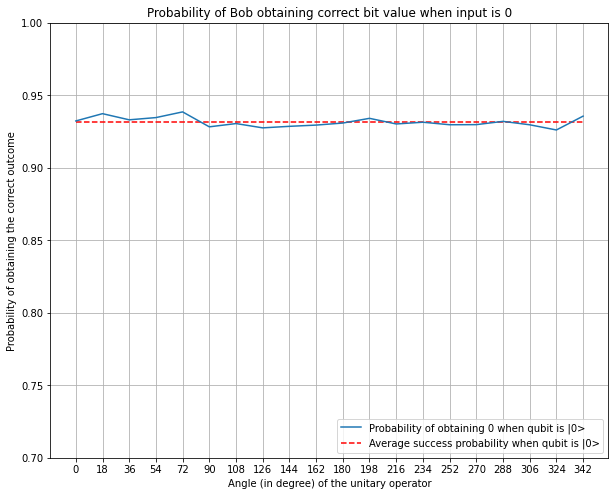

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(theta,zero_20_trials,label='Probability of obtaining 0 when qubit is |0>')
plt.hlines(np.mean(zero_20_trials),theta[0],theta[-1],linestyle='dashed', color='r', label='Average success probability when qubit is |0>')
plt.legend(loc=4)
plt.xticks(theta,[0,18,36,54,72,90,108,126,144,162,180,198,216,234,252,270,288,306,324,342])
plt.xlabel('Angle (in degree) of the unitary operator')
plt.ylabel('Probability of obtaining the correct outcome')
plt.title('Probability of Bob obtaining correct bit value when input is 0')
plt.ylim([0.7,1])
plt.grid()
plt.show()

In [14]:
### The one portion
trials = 15
shots = 2048

for i in range(16,20):
    print('Starting theta: ',theta[i])
    val_one = 0.0
    for j in range(trials):
        #print('Starting trial: ',j)
        qc1 = QuantumCircuit(1)
        qc1.u3(theta[i],0,0,0)
        inv = qc1.to_gate()
        u3dg = inv.inverse()
        u3dg.name = "u3dg"
        
        qc = QuantumCircuit(1)
        qc.x(0)
        qc.u3(theta[i],0,0,0)
        qc.barrier()
        qc.append(u3dg,[0])
        qc.measure_all()
        
        #qc = transpile(qc,backend=backend,basis_gates=['u3','id','u2','u1'])
        
        counts = execute(qc,backend=backend,shots=shots).result().get_counts()
        val_one += float(counts['1']/shots)
    print('For ',i," the average value over ",trials," trials is: ",val_one/trials)

Starting theta:  5.291103416572283
For  16  the average value over  15  trials is:  0.9125651041666667
Starting theta:  5.621797380108051
For  17  the average value over  15  trials is:  0.9062174479166667
Starting theta:  5.9524913436438185
For  18  the average value over  15  trials is:  0.91015625
Starting theta:  6.283185307179586
For  19  the average value over  15  trials is:  0.9088541666666666


In [16]:
one_15_trials = [0.91220703125,0.9109375,0.91171875,0.909375,0.91396484375,0.9139322916666667, 0.91328125,0.9153971354166667,0.9160481770833333,0.9168294270833334,0.9109700520833334,0.9166666666666666,0.9134765625,0.9081380208333333,0.91298828125,0.91220703125,0.9125651041666667,0.9062174479166667,0.91015625,0.9088541666666666]
len(one_15_trials)
print("Mean of 15 trials: ",np.mean(one_15_trials))
print("S.D. of 15 trials: ",np.std(one_15_trials))

Mean of 15 trials:  0.9122965494791668
S.D. of 15 trials:  0.002782772395245814


In [23]:
one_20_trials = [0.918701171875,0.9146240234375,0.9152587890625,0.9128662109375,0.907861328125,0.9117431640625,0.91123046875,0.9112060546875,0.915380859375,0.9130615234375,0.9131591796875,0.91171875,0.9105712890625,0.9123291015625,0.9139404296875,0.9123779296875,0.905712890625,0.912158203125,0.9015869140625,0.9110107421875]
len(one_20_trials)
print("Mean of 20 trials: ",np.mean(one_20_trials))
print("S.D. of 20 trials: ",np.std(one_20_trials))

Mean of 20 trials:  0.911824951171875
S.D. of 20 trials:  0.003535298507947333


In [19]:
np.linspace(0,10,20)

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

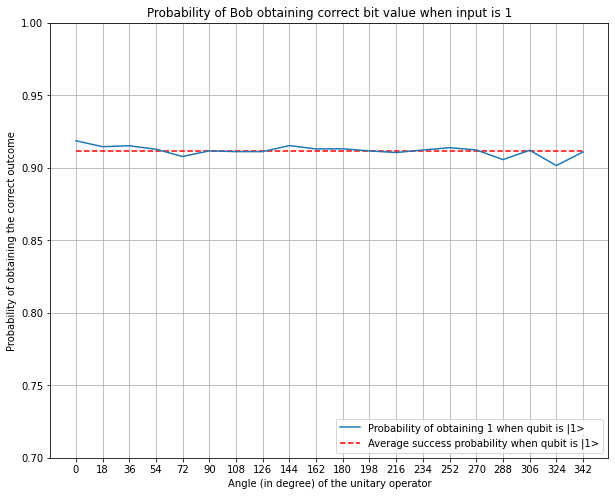

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(theta,one_20_trials,label='Probability of obtaining 1 when qubit is |1>')
plt.hlines(np.mean(one_20_trials),theta[0],theta[-1],linestyle='dashed', color='r', label='Average success probability when qubit is |1>')
plt.legend(loc=4)
plt.xticks(theta,[0,18,36,54,72,90,108,126,144,162,180,198,216,234,252,270,288,306,324,342])
plt.xlabel('Angle (in degree) of the unitary operator')
plt.ylabel('Probability of obtaining the correct outcome')
plt.title('Probability of Bob obtaining correct bit value when input is 1')
plt.ylim([0.7,1])
plt.grid()
plt.show()

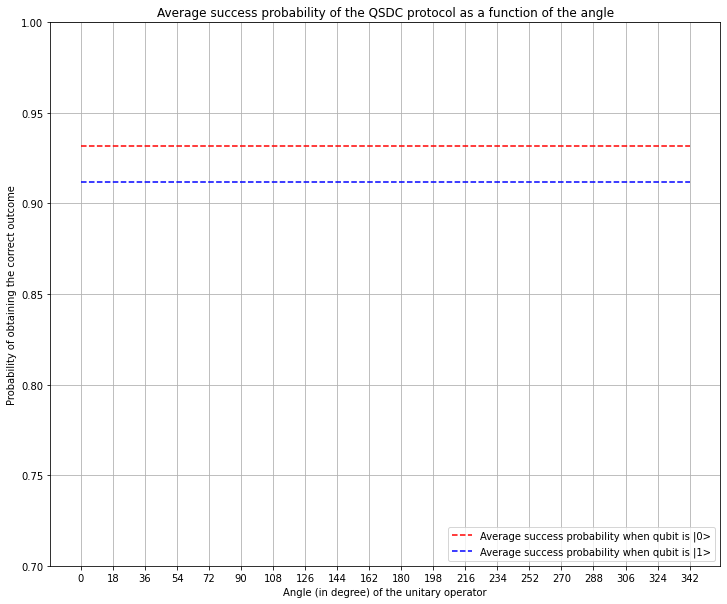

In [30]:
plt.figure(figsize=(12,10))
plt.hlines(np.mean(zero_20_trials),theta[0],theta[-1],linestyle='dashed', color='r', label='Average success probability when qubit is |0>')
plt.hlines(np.mean(one_20_trials),theta[0],theta[-1],linestyle='dashed', color='b', label='Average success probability when qubit is |1>')
plt.title('Average success probability of the QSDC protocol as a function of the angle')
plt.xlabel('Angle (in degree) of the unitary operator')
plt.ylabel('Probability of obtaining the correct outcome')
plt.xticks(theta,[0,18,36,54,72,90,108,126,144,162,180,198,216,234,252,270,288,306,324,342])
plt.legend(loc=4)
plt.ylim([0.7,1])
plt.grid()
plt.show()